# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [22]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score



In [9]:
df_demo = pd.read_csv('df_demo_final.csv')
df_demo.drop('Unnamed: 0', axis=1, inplace=True)
df_demo.isna().any()

posse_de_veiculo                          False
posse_de_imovel                           False
qtd_filhos                                False
idade                                     False
tempo_emprego                             False
possui_celular                            False
possui_fone_comercial                     False
possui_fone                               False
possui_email                              False
qt_pessoas_residencia                     False
mau                                       False
tipo_renda_Pensioner                      False
tipo_renda_State servant                  False
tipo_renda_Student                        False
tipo_renda_Working                        False
educacao_Higher education                 False
educacao_Incomplete higher                False
educacao_Lower secondary                  False
educacao_Secondary / secondary special    False
estado_civil_Married                      False
estado_civil_Separated                  

In [3]:
df_demo.dtypes

Unnamed: 0                                  int64
posse_de_veiculo                            int64
posse_de_imovel                             int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
tipo_renda_Pensioner                        int64
tipo_renda_State servant                    int64
tipo_renda_Student                          int64
tipo_renda_Working                          int64
educacao_Higher education                   int64
educacao_Incomplete higher                  int64
educacao_Lower secondary                    int64
educacao_Secondary / secondary special      int64


In [10]:
y = df_demo.mau
X = df_demo.drop('mau', axis=1)

In [11]:
X.head()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,1,1,0,58.832877,3.106849,1,0,0,0,2.0,...,1,1,0,0,0,1,0,0,0,0
1,0,1,0,52.356164,8.358904,1,0,1,1,1.0,...,1,0,0,1,0,1,0,0,0,0
2,0,1,0,52.356164,8.358904,1,0,1,1,1.0,...,1,0,0,1,0,1,0,0,0,0
3,1,1,0,46.224658,2.106849,1,1,1,1,2.0,...,0,1,0,0,0,1,0,0,0,0
4,1,0,0,29.230137,3.021918,1,0,0,0,2.0,...,0,1,0,0,0,1,0,0,0,0


In [13]:
y

0        False
1        False
2        False
3        False
4        False
         ...  
16645     True
16646     True
16647     True
16648     True
16649     True
Name: mau, Length: 16650, dtype: bool

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, train_size=.7,random_state=100)
X_train.head()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
13649,0,0,1,31.572603,5.183562,1,1,1,0,3.0,...,0,1,0,0,0,1,0,0,0,0
479,1,1,0,60.594521,4.441096,1,0,1,1,2.0,...,1,1,0,0,0,1,0,0,0,0
15216,0,0,1,33.728767,10.873973,1,0,0,0,3.0,...,1,1,0,0,0,1,0,0,0,0
2403,0,0,0,65.024658,16.621918,1,0,0,0,2.0,...,1,1,0,0,0,1,0,0,0,0
9248,1,1,0,31.375342,5.512329,1,0,0,0,2.0,...,0,0,0,0,0,1,0,0,0,0


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [33]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train, y_train)

[Text(0.6195589199073621, 0.9814814814814815, 'tempo_emprego <= 2.848\ngini = 0.044\nsamples = 11655\nvalue = [11392, 263]\nclass = reprovados'),
 Text(0.3643798350728393, 0.9444444444444444, 'tempo_emprego <= 2.845\ngini = 0.059\nsamples = 4279\nvalue = [4149, 130]\nclass = reprovados'),
 Text(0.23091062829976536, 0.9074074074074074, 'idade <= 30.175\ngini = 0.058\nsamples = 4273\nvalue = [4145, 128]\nclass = reprovados'),
 Text(0.06335549472037544, 0.8703703703703703, 'educacao_Incomplete higher <= 0.5\ngini = 0.116\nsamples = 438\nvalue = [411, 27]\nclass = reprovados'),
 Text(0.048494329292139225, 0.8333333333333334, 'idade <= 30.137\ngini = 0.084\nsamples = 388\nvalue = [371, 17]\nclass = reprovados'),
 Text(0.03441533046538913, 0.7962962962962963, 'estado_civil_Single / not married <= 0.5\ngini = 0.071\nsamples = 381\nvalue = [367, 14]\nclass = reprovados'),
 Text(0.01564333202972233, 0.7592592592592593, 'tempo_emprego <= 0.693\ngini = 0.042\nsamples = 283\nvalue = [277, 6]\nclas

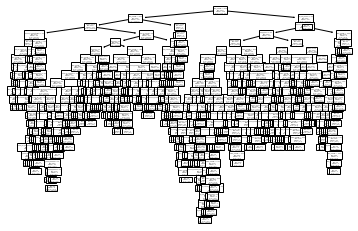

In [34]:
plot_tree(clf, class_names=['reprovados', 'aprovados'], feature_names=X.columns)

C:\Users\mavila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


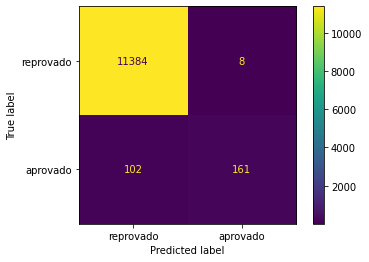

In [35]:
plot_confusion_matrix(clf, X_train, y_train, display_labels=['reprovado', 'aprovado'])

In [36]:
predict = clf.predict(X_train)
accuracy_score(y_train, predict)

0.9905619905619906

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [37]:
pred = clf.predict(X_test)

C:\Users\mavila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


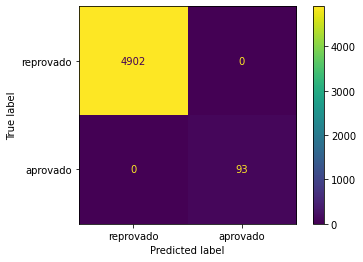

In [38]:
plot_confusion_matrix(clf, X_test, pred, display_labels=['reprovado', 'aprovado'])

In [39]:
accuracy_score(y_test, pred)

0.96996996996997

In [40]:
clf_2 = DecisionTreeClassifier(random_state=123, max_leaf_nodes=5, max_depth=10)
clf_2 = clf_2.fit(X_train, y_train)

C:\Users\mavila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


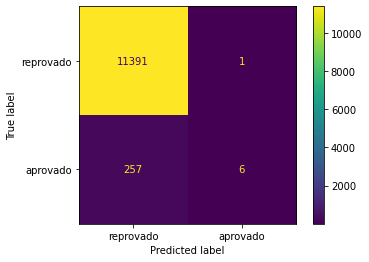

In [31]:
plot_confusion_matrix(clf_2, X_train, y_train, display_labels=['reprovado', 'aprovado'])

In [41]:
pred_2 = clf_2.predict(X_train)

accuracy_score(y_train, pred_2)

0.9778635778635779

In [42]:
df_demo_5 = df_demo.copy()

In [44]:
df_demo_5.mau = True

y_2 = df_demo_5.mau
X_2 = df_demo.drop('mau', axis=1)

In [45]:
X_train, x_test, y_train, y_test = train_test_split(X_2, y_2, random_state=123, test_size=0.3, train_size=0.7)
X_train.head()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
12423,0,1,0,60.487671,-1000.665753,1,0,0,0,2.0,...,1,1,0,0,0,1,0,0,0,0
15866,0,1,0,63.375342,-1000.665753,1,0,0,0,2.0,...,1,1,0,0,0,1,0,0,0,0
1490,0,1,0,33.410959,7.101370,1,0,1,0,1.0,...,0,0,0,1,0,1,0,0,0,0
15855,0,1,1,28.693151,4.715068,1,0,1,0,3.0,...,1,1,0,0,0,1,0,0,0,0
104,0,0,0,43.115068,1.183562,1,0,0,0,1.0,...,0,0,1,0,0,0,0,0,0,1


In [46]:
clf_2 = clf_2.fit(X_train, y_train)

In [47]:
pred = clf_2.predict(X_test)

accuracy_score(y_test, pred)

1.0

##### 5 - Ficou uma acuracia perfeita de 1